# NJIT-CS675: Group Project
### by: Alexander Guillen, William Duggan, and Doug Rizio

## Description of our dataset:

### Video link: [Group Project Video](https://youtu.be/bzEJOXEfpvY)

<br>The Global Surface Temperature Change data distributed by the National Aeronautics 
and Space Administration Goddard Institute for Space Studies (NASA-GISS) is publicly available. 
The FAOSTAT Temperature Change domain includes some extra information in this data set like Area names. 
Because in this project our key value is country names, I chose to use FAO's data set.<br>


<br><br>Data in the Temperature Change domain can be reachable from the Food and Agriculture Organization 
of the United Nations' [web data portal²](http://www.fao.org/faostat/en/#data/ET). According to the license of 
[FAO Statistical Database Terms of Use](http://www.fao.org/contact-us/terms/db-terms-of-use/en/), the data set can be used for research, statistical, 
and scientific purposes. It can be access, download, create copies and re-disseminated 
datasets subject to these Dataset Terms.

![Climate Change](http://282552295731160976.weebly.com/uploads/4/0/8/4/40849883/9376348_orig.png)


<br>The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2021. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available.² It includes areas of all the countries and territories of the world. The data covers monthly, seasonal, yearly temperature changes as Celsius degrees °C. The frequency of dissemination and release calendar of the data is the yearly base. The format is a 3 seperate comma-separated value (CSV) files, and has the tabular format and totals 67.9 megabytes.

<br><br>Further examination on the attributes and features revealed years with some missing values. However, we will attempt to visualize in depth using most key values provided below;<br>

* Area Code: The numerical code of area column, type of area code is an integer.
* Area: Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object.
* Months Code: The numerical code of months column, type of months code is an integer.
* Months: Months, Seasons, Meteorological year, type of months is an object.
-- Months: 'January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'
-- Seasons: "Dec\Jan\Feb", "Mar\Apr\May", "Jun\Jul\Aug","Sep\Oct\Nov'
-- Year: 'Meteorological year'
* Element Code: The numerical code of element column, type of element code is an integer.
* Element: 'Temperature change', 'Standard Deviation', type of element is an object.
* Unit: Celsius degrees °C, type of unit is an object.

Source: [Climate Data](https://www.fao.org/faostat/en/#data/ET/visualize)

<br>Downloading from above source and preprocessing the 3 files locally, we relabelled our files to account for uploading to local drives so we can work within notebooks.

In [3]:
# Group project objective is to (i) identify key distinguishing areas of climate change
# (ii) Compare results found across continents that are most profound and (iii)
# report our results to explain useful information gained.

# Importing libraries
import prophet
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef
from IPython.display import Image

In [4]:
# Loading dataset from local directory
df1 = pd.read_csv("Environment_Temperature_1.csv", encoding='cp1252')
df2 = pd.read_csv("Environment_Temperature_2.csv", encoding='cp1252')
df3 = pd.read_csv("Environment_Temperature_3.csv", encoding='cp1252')
df4 = pd.read_csv("Environment_Temperature_bymo.csv", encoding='cp1252')
df5 = pd.read_csv("Environment_Temperature_bysea.csv", encoding='cp1252')
df6 = pd.read_csv("Environment_Temperature_bymeteor.csv", encoding='cp1252')

In [5]:
len(df2.columns)

68

In [6]:
df2.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
count,9656.000000,9656.000000,9656.00000,8291.000000,8320.000000,8292.000000,8250.000000,8253.000000,8357.000000,8312.000000,...,8343.000000,8423.000000,8359.000000,8353.000000,8329.000000,8301.000000,8343.000000,8330.000000,8310.000000,8289.000000
mean,821.809859,7009.882353,6674.50000,0.399884,0.310331,0.319776,0.267231,0.218184,0.376302,0.263960,...,0.772847,0.813297,0.892958,0.995867,1.061576,0.989082,0.992751,1.074814,1.110044,1.005705
std,1781.081871,6.038255,596.53089,0.702711,0.714969,0.850590,0.750174,0.739943,0.737808,0.725074,...,0.854342,0.711787,0.811813,0.835688,0.875282,0.804069,0.870476,0.841213,0.947464,0.811845
min,1.000000,7001.000000,6078.00000,-4.063000,-5.359000,-8.483000,-7.241000,-4.729000,-8.144000,-6.529000,...,-5.702000,-3.736000,-5.332000,-4.058000,-3.323000,-3.454000,-2.213000,-2.635000,-3.986000,-3.777000
25%,78.000000,7005.000000,6078.00000,0.052000,-0.043000,0.035000,-0.112750,-0.212000,0.056000,-0.167000,...,0.364000,0.398500,0.409000,0.427000,0.449000,0.437000,0.428000,0.452000,0.452000,0.429000
50%,153.500000,7009.000000,6674.50000,0.366000,0.330000,0.354000,0.328000,0.297000,0.361000,0.307000,...,0.630000,0.702000,0.724000,0.826000,0.924000,0.858000,0.786000,0.916000,0.930000,0.847000
75%,226.250000,7016.000000,7271.00000,0.676000,0.624000,0.648000,0.609750,0.583000,0.659000,0.602000,...,1.087000,1.103500,1.159500,1.358000,1.471000,1.336000,1.321000,1.464000,1.496000,1.394000
max,5873.000000,7020.000000,7271.00000,5.790000,4.373000,4.773000,5.279000,5.153000,5.771000,4.770000,...,10.820000,6.687000,11.752000,7.583000,10.163000,7.376000,9.109000,7.093000,8.671000,7.651000


In [7]:
df2.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2017           1355
Y2018           1313
Y2019           1326
Y2020           1346
Y2021           1367
Length: 68, dtype: int64

In [8]:
aa = df2[df2['Area'] == 'Americas']
print(aa.info)

<bound method DataFrame.info of       Area Code      Area  Months Code               Months  Element Code  \
8636       5200  Americas         7001              January          7271   
8637       5200  Americas         7001              January          6078   
8638       5200  Americas         7002             February          7271   
8639       5200  Americas         7002             February          6078   
8640       5200  Americas         7003                March          7271   
8641       5200  Americas         7003                March          6078   
8642       5200  Americas         7004                April          7271   
8643       5200  Americas         7004                April          6078   
8644       5200  Americas         7005                  May          7271   
8645       5200  Americas         7005                  May          6078   
8646       5200  Americas         7006                 June          7271   
8647       5200  Americas         7006      

In [9]:
# Americas data
temp_df = aa.rename(columns = {'Area Code':'area_code', 'Area':'area', 'Months Code':'months_code','Months':'months','Element Code':'element_code','Element':'element','Unit':'unit'})

In [10]:
# Americas data
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp_months = temp_df[temp_df['months'].isin(months)]

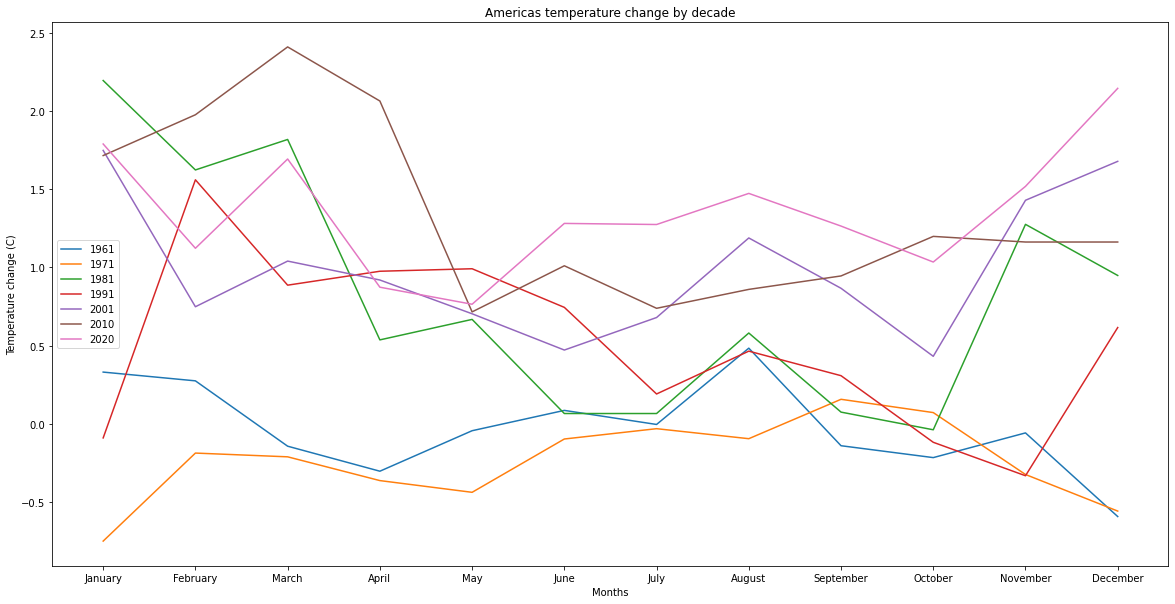

In [11]:
# Visualizing data by temp change over the decades
# Americas
plt.figure(figsize=(20,10))
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1961.loc[temp_months.element=='Temperature change'], label='1961')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1971.loc[temp_months.element=='Temperature change'], label='1971')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1981.loc[temp_months.element=='Temperature change'], label='1981')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1991.loc[temp_months.element=='Temperature change'], label='1991')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2001.loc[temp_months.element=='Temperature change'], label='2001')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2010.loc[temp_months.element=='Temperature change'], label='2010')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2020.loc[temp_months.element=='Temperature change'], label='2020')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Americas temperature change by decade')
plt.show()

We can see significant rise in temperature over the decades according to the above illustration where we begin examining Year: 1961 in <font color='#008DFF'>blue.</font> and progress towards the most recent Year: 2020 in <font color='#ff00ff'>Magenta.</font> at the top.


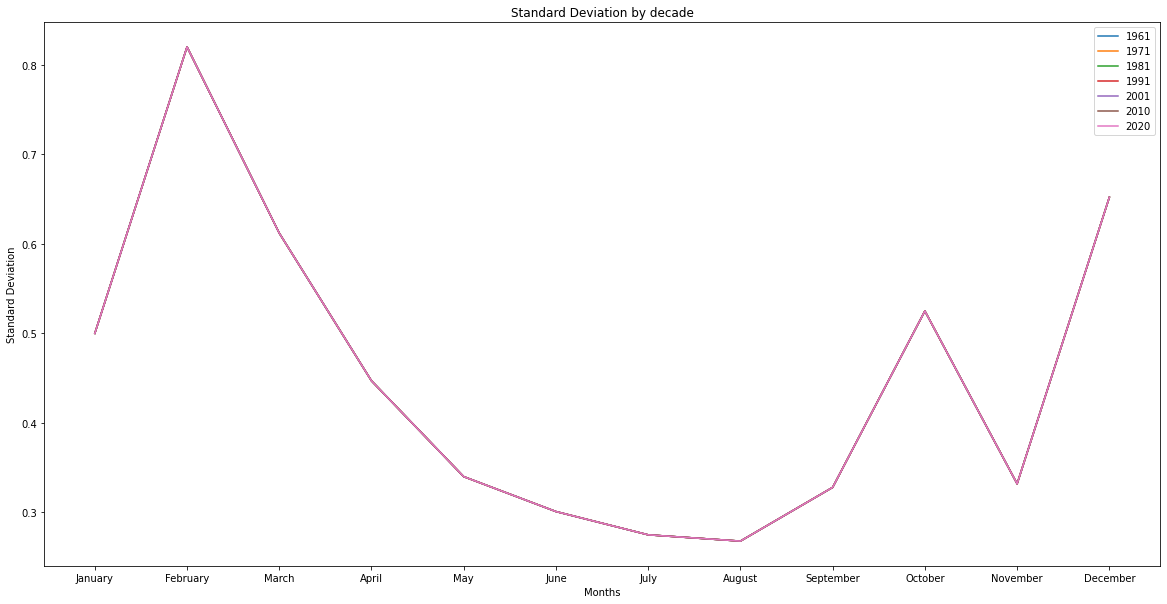

In [12]:
# Standard deviation 
# Americas
plt.figure(figsize=(20,10))
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y1961.loc[temp_months.element=='Standard Deviation'], label='1961')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y1971.loc[temp_months.element=='Standard Deviation'], label='1971')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y1981.loc[temp_months.element=='Standard Deviation'], label='1981')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y1991.loc[temp_months.element=='Standard Deviation'], label='1991')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y2001.loc[temp_months.element=='Standard Deviation'], label='2001')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y2010.loc[temp_months.element=='Standard Deviation'], label='2010')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Standard Deviation'],y=temp_months.Y2020.loc[temp_months.element=='Standard Deviation'], label='2020')
plt.xlabel('Months')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation by decade')
plt.show()

In [13]:
# This dataset is going to explore a bunch of the continetnatl differences and how they correlate with the drop in temperature. 
# As a team we have divided this into 3 parts: The Americas, Europe, and China and the western coutries.

ab = df4[['Months','Year','Element','Value']]
print('===========================')
print(ab.info())
print('===========================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Months   1464 non-null   object 
 1   Year     1464 non-null   int64  
 2   Element  1464 non-null   object 
 3   Value    1464 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 45.9+ KB
None


In [14]:
ab.drop(ab[ab.Element == 'Standard Deviation'].index, inplace = True)
print(ab)

        Months  Year             Element  Value
0      January  1961  Temperature change  0.330
1      January  1962  Temperature change -0.362
2      January  1963  Temperature change -0.318
3      January  1964  Temperature change  0.656
4      January  1965  Temperature change -0.068
...        ...   ...                 ...    ...
1398  December  2017  Temperature change  1.544
1399  December  2018  Temperature change  1.686
1400  December  2019  Temperature change  1.698
1401  December  2020  Temperature change  2.145
1402  December  2021  Temperature change  1.607

[732 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
ab.isnull().sum()

Months     0
Year       0
Element    0
Value      0
dtype: int64

In [16]:
# Subsetting for evaling values by month and year
ab1 = ab[['Months','Year','Value']]
print(ab1)

        Months  Year  Value
0      January  1961  0.330
1      January  1962 -0.362
2      January  1963 -0.318
3      January  1964  0.656
4      January  1965 -0.068
...        ...   ...    ...
1398  December  2017  1.544
1399  December  2018  1.686
1400  December  2019  1.698
1401  December  2020  2.145
1402  December  2021  1.607

[732 rows x 3 columns]


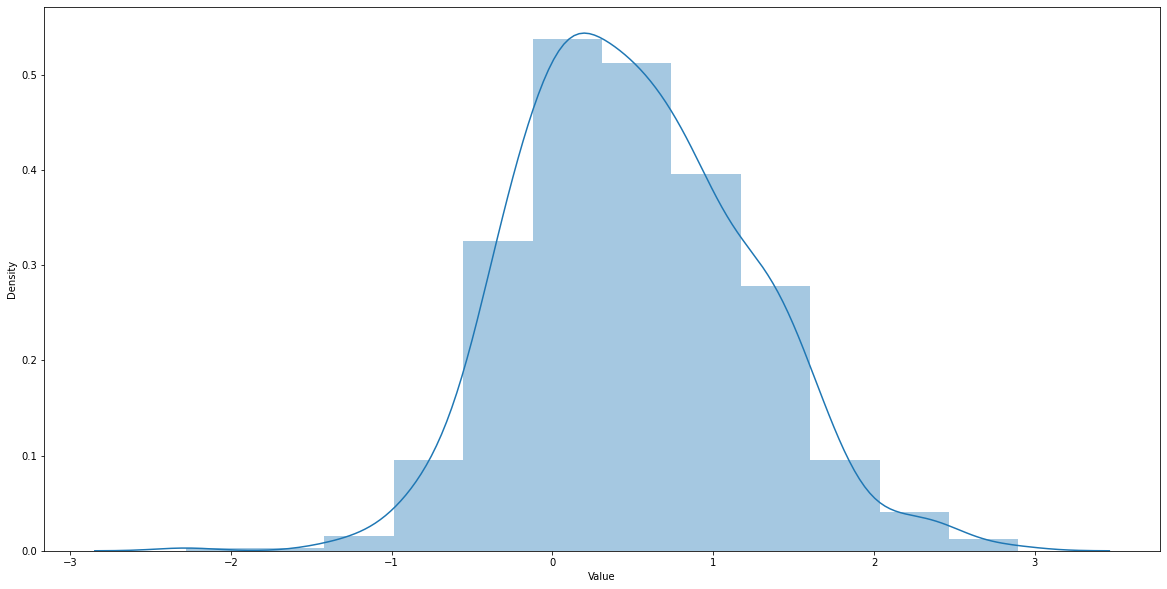

In [17]:
# Checking details of temp change ditribution
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,10
import warnings
warnings.filterwarnings('ignore')



v1 = sns.distplot(ab1['Value'], bins=12)

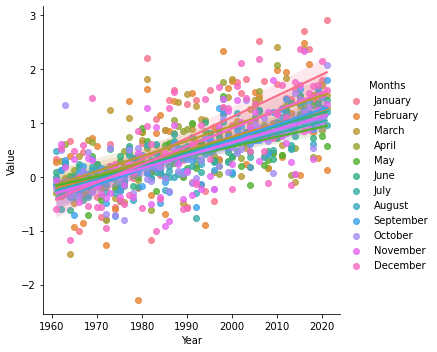

In [18]:
# Checking outliers
v2 = sns.lmplot(data=ab1, x='Year', y='Value', hue='Months')

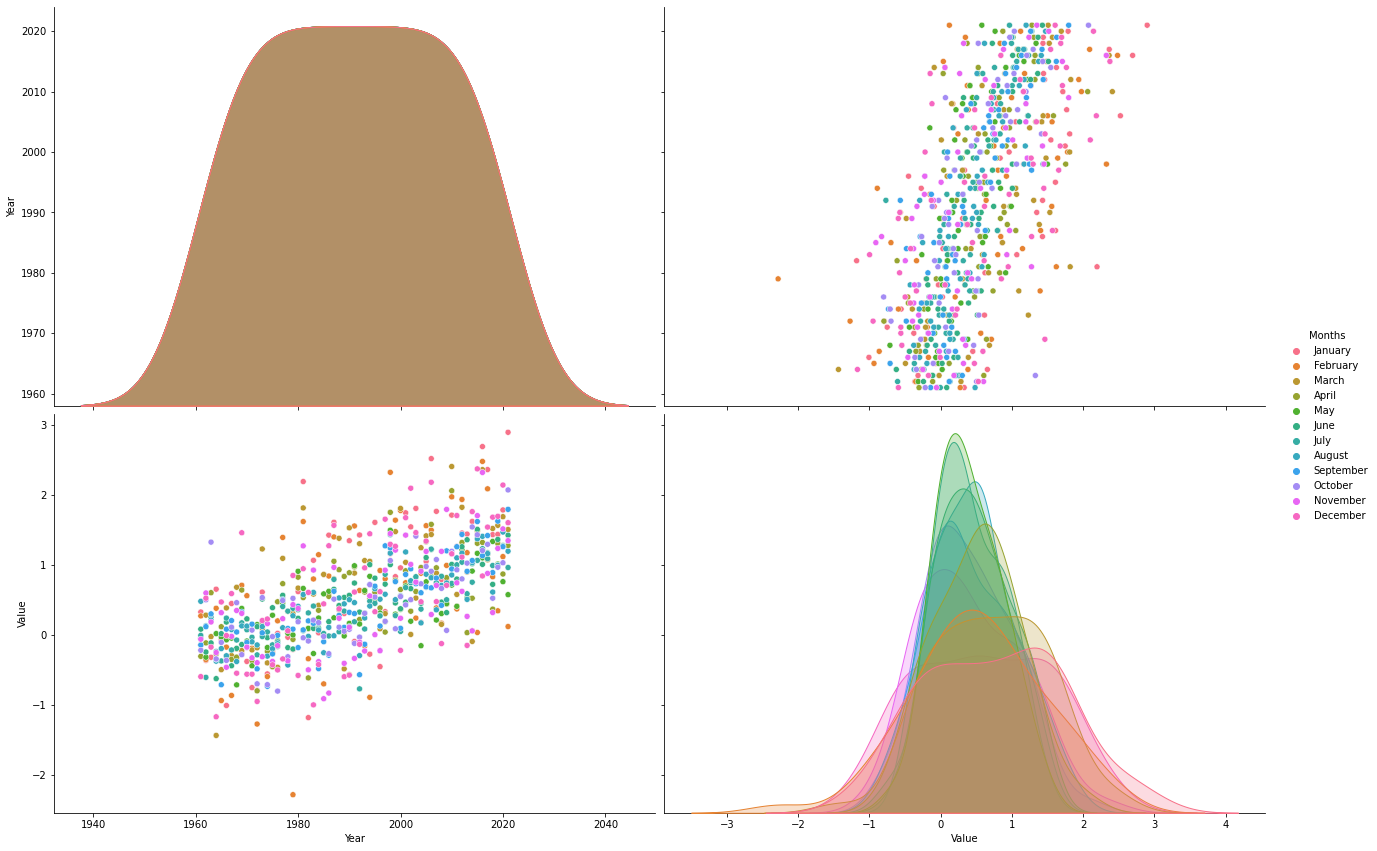

In [19]:
sns.pairplot(data=ab1, hue='Months', aspect=1.5, height=6)

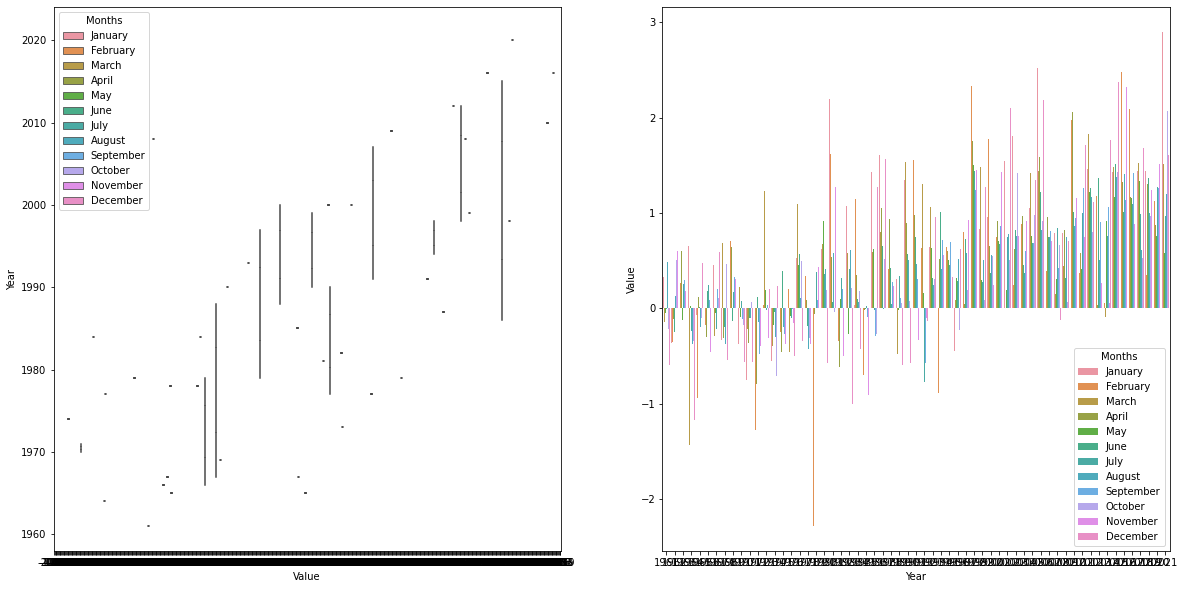

In [20]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=ab1, x='Value', y='Year', hue='Months', ax=axs[0])
sns.barplot(data=ab1, x='Year', y='Value', hue='Months', ax=axs[1])

In [21]:
jan = ab1[ab1['Months'] == 'January']
print(jan)

     Months  Year  Value
0   January  1961  0.330
1   January  1962 -0.362
2   January  1963 -0.318
3   January  1964  0.656
4   January  1965 -0.068
..      ...   ...    ...
56  January  2017  2.366
57  January  2018  1.436
58  January  2019  1.440
59  January  2020  1.789
60  January  2021  2.899

[61 rows x 3 columns]


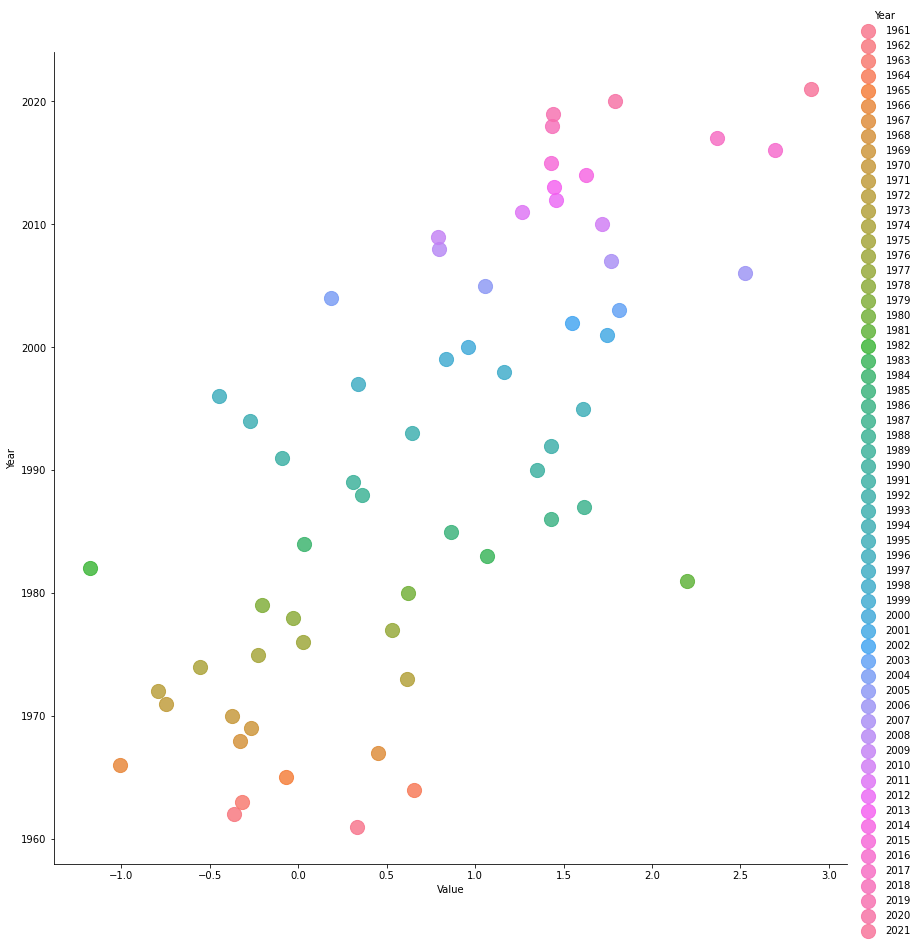

In [22]:
sns.lmplot(data=jan, x='Value', y='Year', fit_reg=False , size=12, hue='Year', scatter_kws={"s":200})

In [23]:
feb = ab1[ab1['Months'] == 'February']
print(feb)

       Months  Year  Value
122  February  1961  0.274
123  February  1962 -0.350
124  February  1963  0.270
125  February  1964  0.383
126  February  1965 -0.936
..        ...   ...    ...
178  February  2017  2.091
179  February  2018  0.834
180  February  2019  0.347
181  February  2020  1.122
182  February  2021  0.122

[61 rows x 3 columns]


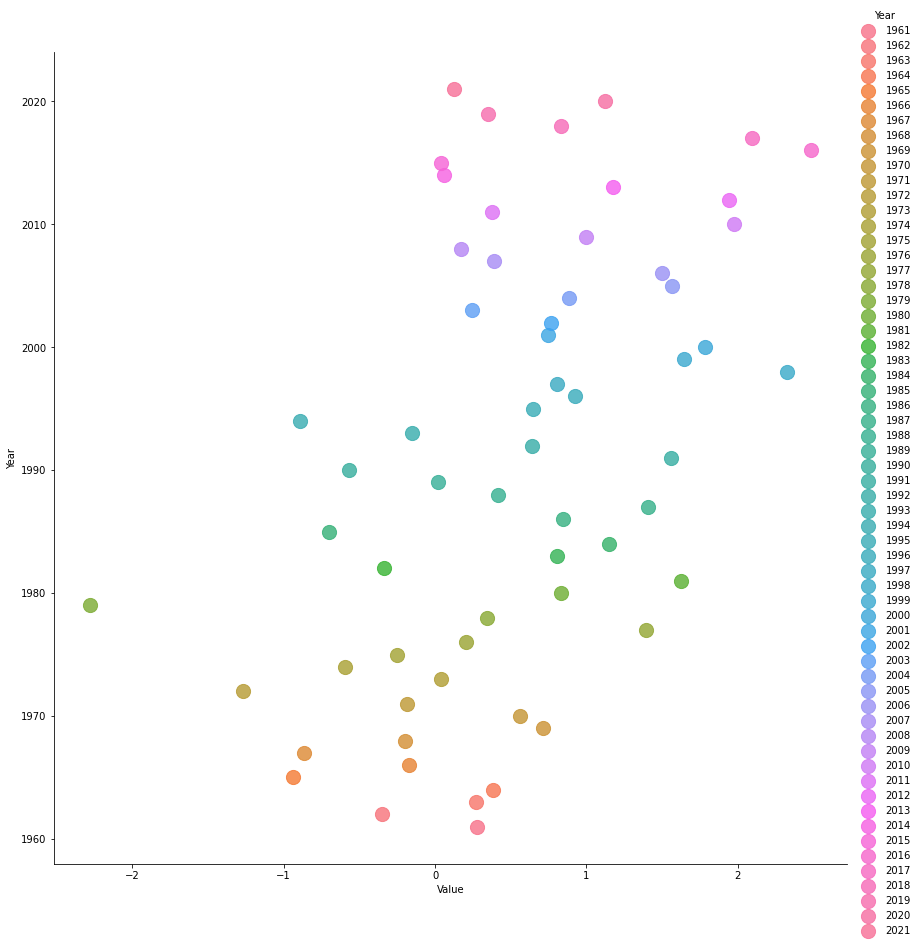

In [24]:
sns.lmplot(data=feb, x='Value', y='Year', fit_reg=False , size=12, hue='Year', scatter_kws={"s":200})

In [25]:
mar = ab1[ab1['Months'] == 'March']
print(mar)

    Months  Year  Value
244  March  1961 -0.144
245  March  1962  0.285
246  March  1963 -0.022
247  March  1964 -1.435
248  March  1965 -0.495
..     ...   ...    ...
300  March  2017  1.076
301  March  2018  1.524
302  March  2019  1.569
303  March  2020  1.693
304  March  2021  1.509

[61 rows x 3 columns]


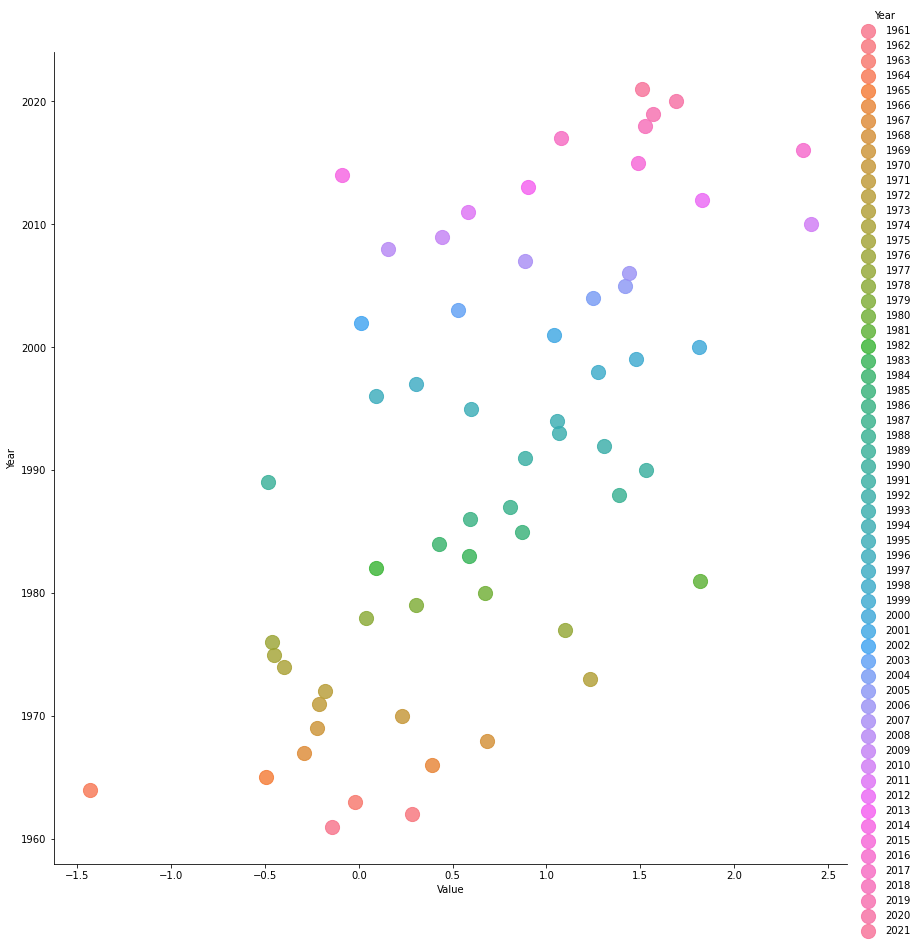

In [26]:
sns.lmplot(data=mar, x='Value', y='Year', fit_reg=False , size=12, hue='Year', scatter_kws={"s":200})

In [27]:
# Exploring by season
sea = df5[['Months','Year','Element','Value']]

In [28]:
sea.drop(sea[sea.Element == 'Standard Deviation'].index, inplace = True)
print(sea)

          Months  Year             Element  Value
0    Dec–Jan–Feb  1961  Temperature change  0.319
1    Dec–Jan–Feb  1962  Temperature change -0.435
2    Dec–Jan–Feb  1963  Temperature change  0.160
3    Dec–Jan–Feb  1964  Temperature change  0.289
4    Dec–Jan–Feb  1965  Temperature change -0.724
..           ...   ...                 ...    ...
422  Sep–Oct–Nov  2017  Temperature change  1.201
423  Sep–Oct–Nov  2018  Temperature change  0.581
424  Sep–Oct–Nov  2019  Temperature change  1.279
425  Sep–Oct–Nov  2020  Temperature change  1.272
426  Sep–Oct–Nov  2021  Temperature change  1.740

[244 rows x 4 columns]


In [29]:
sea1 = sea[['Months','Year','Value']]
print(sea1)

          Months  Year  Value
0    Dec–Jan–Feb  1961  0.319
1    Dec–Jan–Feb  1962 -0.435
2    Dec–Jan–Feb  1963  0.160
3    Dec–Jan–Feb  1964  0.289
4    Dec–Jan–Feb  1965 -0.724
..           ...   ...    ...
422  Sep–Oct–Nov  2017  1.201
423  Sep–Oct–Nov  2018  0.581
424  Sep–Oct–Nov  2019  1.279
425  Sep–Oct–Nov  2020  1.272
426  Sep–Oct–Nov  2021  1.740

[244 rows x 3 columns]


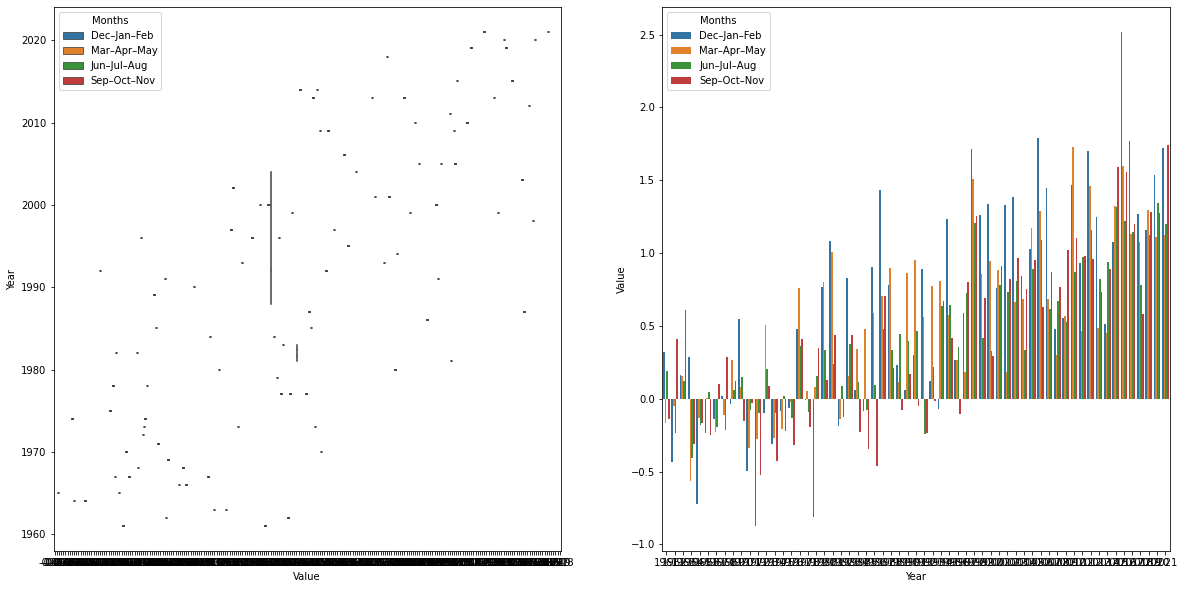

In [30]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=sea1, x='Value', y='Year', hue='Months', ax=axs[0])
sns.barplot(data=sea1, x='Year', y='Value', hue='Months', ax=axs[1])

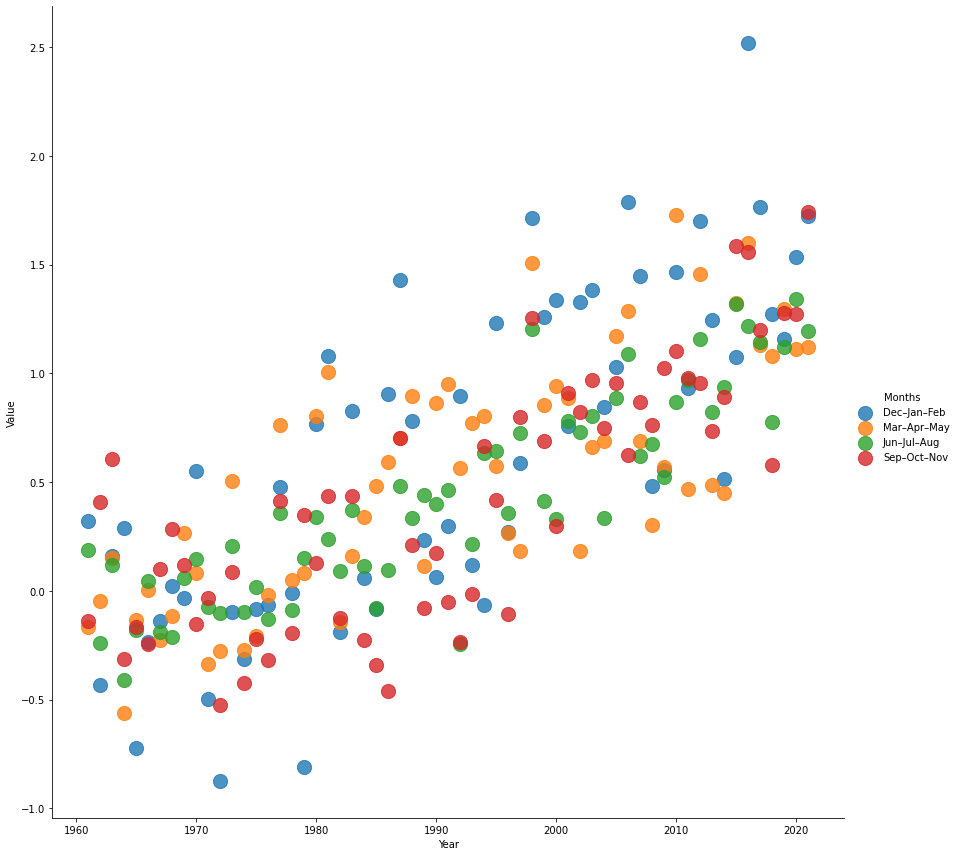

In [31]:
sns.lmplot(data=sea1, x='Year', y='Value', fit_reg=False , size=12, hue='Months', scatter_kws={"s":200})

###The seasonal evaluation of temperature changes found that 'Dec-Jan-Feb' months had the most significance, while depicting the overall change in temperature increasing over the years.

In [32]:
# Predicting the future!
def preprocess_inputs(df1):
    America = df1.copy()
    
    # Remove the standard deviation examples
    America = America.query("Element == 'Temperature change'")
    
    # Group countries and take their means
    America = America.groupby('Area').mean()
    
    # Use only time series data
    America = America.loc[:, 'Y1991':]
    
    # Get European mean temperature change
    America = pd.DataFrame(America.mean()).reset_index(drop=False)
    
    # Rename columns
    America.columns=['ds', 'y']
    
    # Fix year column
    America['ds'] = America['ds'].apply(lambda x: x[1:]).astype(np.int)
    

In [33]:
time_series = preprocess_inputs(df1)

In [34]:
time_series

In [35]:
future_df = pd.DataFrame(np.arange(2020, 2060), columns=['ds'])
future_df

,ds
0,2020
1,2021
2,2022
3,2023
4,2024
5,2025
6,2026
7,2027
8,2028
9,2029
